In [1]:
## Inputs:

import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for clustering
from sklearn.cluster import KMeans




import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#import shap
#import umap
import seaborn as sns
#import tensorflow as tf
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Input, Dense


In [2]:

sample_path = "/blue/carpena/haasehelen/ifwaste/input/gsua_based_configuration/samples/"
df_h = pd.read_csv( sample_path + "household_ifwaste_sample_df.txt", sep="\t") 
df_nh = pd.read_csv( sample_path + "neighborhood_ifwaste_sample_df.txt", sep="\t") 
df_sim = pd.read_csv( sample_path + "household_ifwaste_sample_df.txt", sep="\t")

In [3]:

#for gauss -> z score
#for log norm -> log transform (to gauss)
#else -> quantile bucketing (https://developers.google.com/machine-learning/crash-course/numerical-data/binning#quantile_bucketing)

##categorical data:
# single -> transform to number
# multi -> Jaccard similarity ratio of common values to total values

## TODO -> fix n_shop + n_quickshop
# figure out which algorithm fits best: https://scikit-learn.org/stable/modules/clustering.html
# how much scattering between exact reruns?
# ignore ramp up phase?
# stochastic part from gsua as similarity?

### Input distributions across all household of 1 simulation

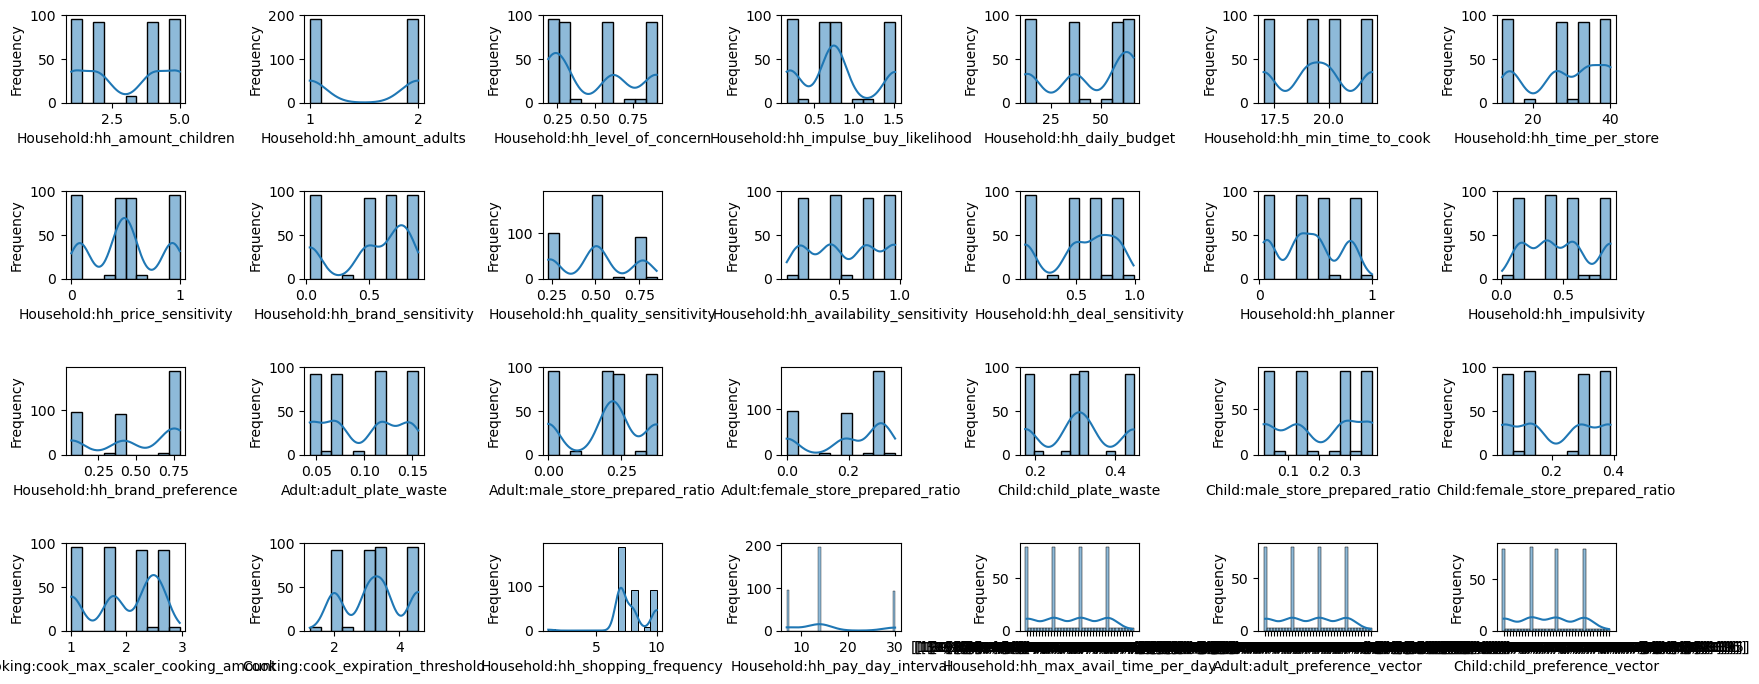

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(4,7, figsize=(20,8))
for i in range(4):
    for j in range(7):
        column = df_h.columns[i*7+j]
        sns.histplot(df_h[column], ax=axs[i,j], kde=True) # stat="density"
        axs[i,j].set_xlabel(column)
        axs[i,j].set_ylabel("Frequency")
fig.subplots_adjust(wspace=1, hspace=1)
plt.show()

### Output distributions across all household of 1 simulation

In [5]:
sample_path = "/blue/carpena/haasehelen/ifwaste/output/gsua_test/run_0/"
filename = "aggregated_outputs.csv"

outputs = pd.read_csv( sample_path + filename) 
outputs.head()

,household,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,n_quickcook,n_cook,n_leftovers,n_shop,n_quickshop
0,238.0,190.970,141.232,250.784,77.027,69.423,124.760,210.256,283.039,609.265,172.149,523.606,330.592,210.256,100.0,0.0,0.0,13.0,100.0
1,344.0,141.716,171.889,302.886,103.949,113.335,93.308,247.578,294.357,685.844,194.458,603.835,323.246,247.578,100.0,0.0,0.0,15.0,100.0
2,187.0,269.265,257.170,359.139,210.801,171.084,166.281,279.748,366.738,1121.134,225.616,1006.713,427.027,279.748,90.0,10.0,85.0,15.0,56.0
3,156.0,165.293,138.677,179.334,101.847,94.251,142.439,161.786,205.754,641.526,136.348,553.082,268.760,161.786,100.0,0.0,0.0,15.0,100.0
4,310.0,212.848,178.323,167.524,127.392,134.470,116.252,176.306,232.163,708.815,172.137,686.373,250.436,176.306,100.0,0.0,0.0,15.0,100.0


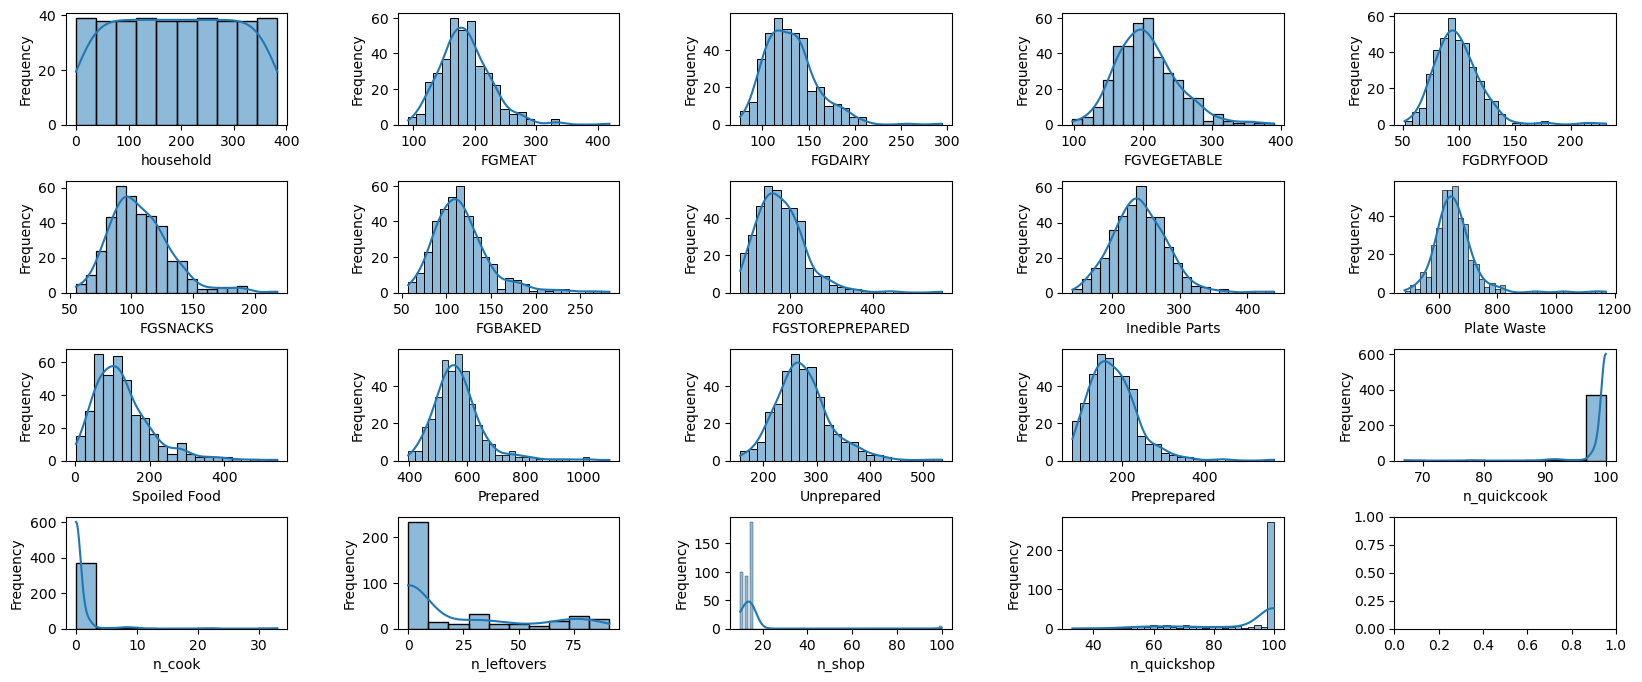

In [6]:

fig, axs = plt.subplots(4,5, figsize=(20,8))

for i in range(4):
    for j in range(5):
        if i*5+j >= 19:
            break
        column = outputs.columns[i*5+j]
        sns.histplot(outputs[column], ax=axs[i,j], kde=True) # stat="density"
        axs[i,j].set_xlabel(column)
        axs[i,j].set_ylabel("Frequency")
fig.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

## Normalized output data


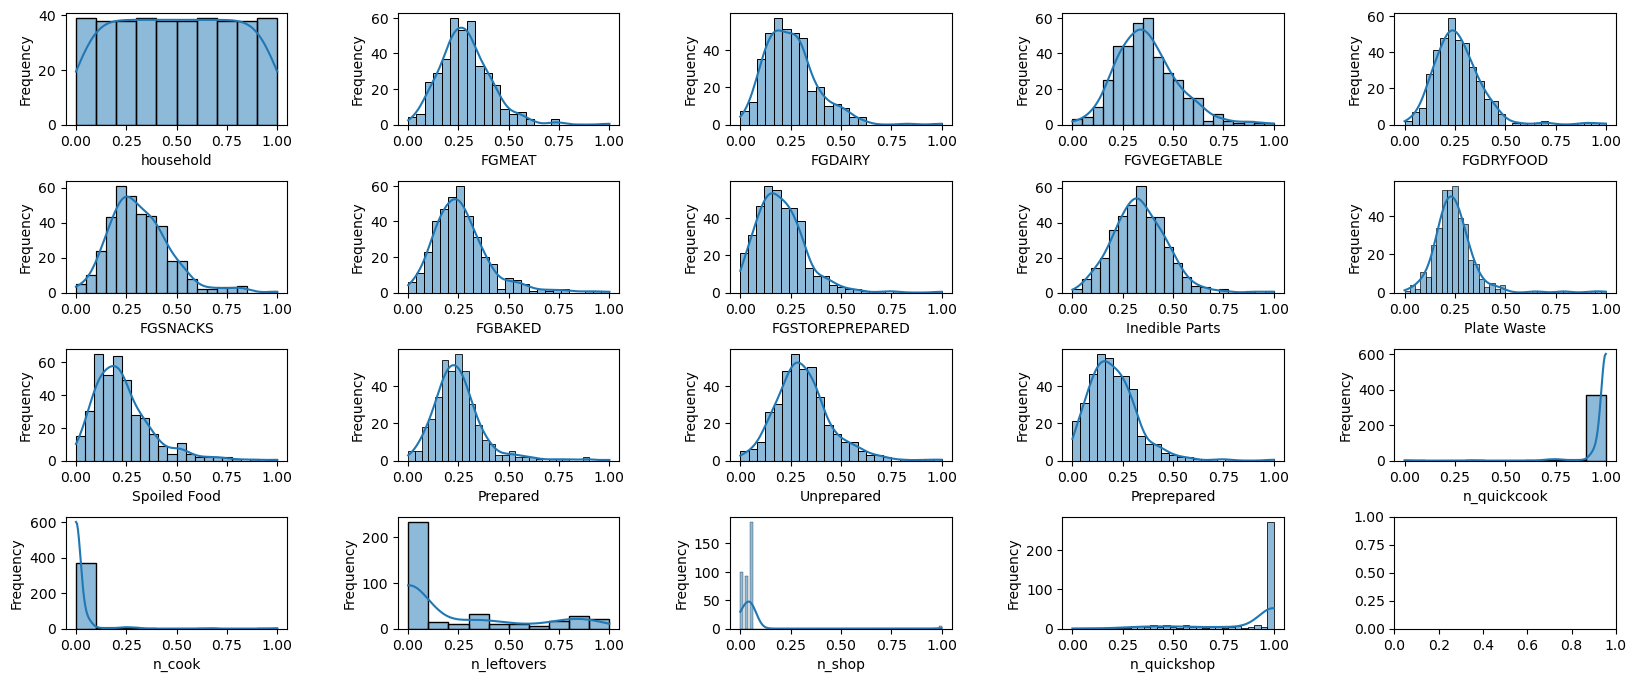

In [7]:
import pandas as pd
from sklearn import preprocessing


x = outputs.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
outputs_normalized = pd.DataFrame(x_scaled,columns=outputs.columns)

fig, axs = plt.subplots(4,5, figsize=(20,8))

for i in range(4):
    for j in range(5):
        if i*5+j >= 19:
            break
        column = outputs_normalized.columns[i*5+j]
        sns.histplot(outputs_normalized[column], ax=axs[i,j], kde=True) # stat="density"
        axs[i,j].set_xlabel(column)
        axs[i,j].set_ylabel("Frequency")
fig.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [8]:
outputs = outputs.drop(columns=["n_shop", "n_quickshop", "household"])
outputs_normalized = outputs_normalized.drop(columns=["n_shop", "n_quickshop", "household"])

### Example K=4 Means

In [9]:
 #set number of clusters
k = 4

# cluster the images
kmeans_model = KMeans(n_clusters=k).fit(outputs)


In [10]:
labels_df = pd.DataFrame(data=np.transpose(kmeans_model.labels_), index=outputs_normalized.index, columns=['cluster'])

# list countries in each cluster:
for i in range(k):
    print(f'HH in Cluster {i}:')
    print(labels_df.index[labels_df['cluster']==i].tolist())
    print(len(labels_df.index[labels_df['cluster']==i].tolist()))

HH in Cluster 0:
[5, 9, 10, 11, 23, 26, 27, 28, 39, 43, 45, 54, 55, 57, 63, 65, 68, 69, 71, 72, 75, 76, 83, 84, 86, 91, 93, 96, 99, 100, 107, 113, 114, 115, 118, 120, 125, 126, 130, 139, 155, 158, 162, 165, 166, 167, 168, 173, 174, 176, 179, 183, 192, 194, 196, 197, 201, 205, 207, 208, 209, 211, 216, 218, 222, 226, 230, 231, 234, 239, 240, 241, 244, 245, 248, 256, 259, 265, 268, 271, 274, 280, 283, 284, 291, 293, 296, 298, 299, 301, 304, 315, 317, 319, 320, 321, 327, 330, 331, 333, 338, 340, 344, 346, 351, 352, 354, 356, 357, 358, 359, 368, 369, 376, 377, 380, 383]
117
HH in Cluster 1:
[2, 22, 31, 38, 70, 117, 121, 137, 143, 145, 147, 199, 214, 215, 224, 273, 275, 281, 325]
19
HH in Cluster 2:
[3, 6, 7, 8, 12, 13, 16, 17, 20, 21, 29, 30, 32, 33, 34, 35, 36, 37, 40, 41, 44, 47, 51, 52, 56, 58, 60, 61, 64, 66, 67, 73, 74, 77, 79, 81, 82, 85, 87, 88, 92, 95, 97, 98, 101, 108, 109, 110, 122, 123, 124, 127, 129, 132, 134, 141, 142, 146, 148, 149, 150, 152, 153, 156, 160, 161, 163, 164, 169,

In [11]:
# Get centroids of each cluster.
for i in range(k):
    print(f'\nCluster {i}:')
    # display non-normalized mean values
    mean_to_display = outputs[labels_df['cluster']==i].mean()
    display(mean_to_display)


Cluster 0:


FGMEAT             188.570812
FGDAIRY            129.816368
FGVEGETABLE        219.055103
FGDRYFOOD           99.351479
FGSNACKS           106.295786
FGBAKED            112.673607
FGSTOREPREPARED    129.362009
Inedible Parts     254.466154
Plate Waste        656.843162
Spoiled Food        73.815701
Prepared           573.072889
Unprepared         282.690205
Preprepared        129.362009
n_quickcook         99.735043
n_cook               0.264957
n_leftovers         18.230769
dtype: float64


Cluster 1:


FGMEAT             244.494947
FGDAIRY            176.783895
FGVEGETABLE        267.663632
FGDRYFOOD          149.324842
FGSNACKS           162.794000
FGBAKED            176.807632
FGSTOREPREPARED    324.317421
Inedible Parts     294.421474
Plate Waste        882.903158
Spoiled Food       324.861789
Prepared           841.826368
Unprepared         336.042842
Preprepared        324.317421
n_quickcook         96.000000
n_cook               4.000000
n_leftovers         80.052632
dtype: float64


Cluster 2:


FGMEAT             163.410717
FGDAIRY            116.644703
FGVEGETABLE        175.287986
FGDRYFOOD           88.528891
FGSNACKS            94.894935
FGBAKED            103.733551
FGSTOREPREPARED    175.073167
Inedible Parts     211.402268
Plate Waste        604.406964
Spoiled Food       101.764667
Prepared           503.378754
Unprepared         239.121986
Preprepared        175.073167
n_quickcook         99.608696
n_cook               0.391304
n_leftovers         22.572464
dtype: float64


Cluster 3:


FGMEAT             197.546545
FGDAIRY            141.882173
FGVEGETABLE        218.557700
FGDRYFOOD          103.607791
FGSNACKS           113.049391
FGBAKED            128.790973
FGSTOREPREPARED    210.881709
Inedible Parts     254.725364
Plate Waste        675.955955
Spoiled Food       183.635109
Prepared           601.322073
Unprepared         302.112655
Preprepared        210.881709
n_quickcook         99.609091
n_cook               0.390909
n_leftovers         10.800000
dtype: float64

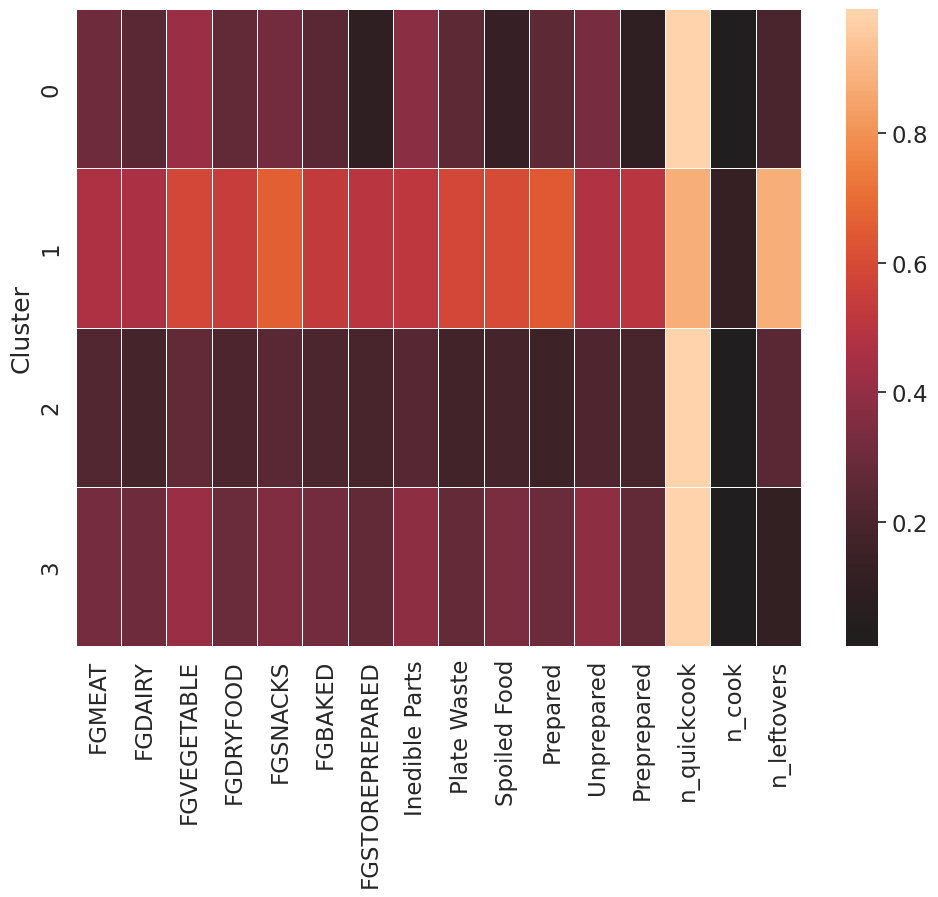

In [12]:
# get normalized values
normalized_means = []
for i in range(k):
    # calculate normalized values for the next part
    mean_normalized = outputs_normalized[labels_df['cluster']==i].mean()
    normalized_means.append(mean_normalized.to_frame().transpose())
normalized_means_df = pd.concat(normalized_means)

# For better visualization, we'll multiply the following features by -1
# so that a higher value is associated with more development.

# Plot heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1.5)
ax = sns.heatmap(normalized_means_df.to_numpy(), linewidth=0.5, xticklabels=normalized_means_df.columns, center=0)
ax.set_ylabel("Cluster")


plt.show()

In [13]:
'''def rank_algorithms(result_dict):
    sil_max = max(v['silhouette'] for v in result_dict.values())
    cal_max = max(v['calinski'] for v in result_dict.values())
    dav_min = min(v['davies'] for v in result_dict.values())

    scores = {}
    for name, v in result_dict.items():
        score = 0
        if v['silhouette'] == sil_max:
            print(name, " silhouette: ", v["silhouette"])
            score += 1
        if v['calinski'] == cal_max:
            print(name," calinski: ", v["calinski"])
            score += 1
        if v['davies'] == dav_min:
            print(name," davies: ", v["davies"])
            score += 1
        scores[name] = score
    return scores

ranked_scores = rank_algorithms(results)
best_algo_name = max(ranked_scores, key=ranked_scores.get)
labels_final = results[best_algo_name]['labels']
print(ranked_scores)
print( "--->", best_algo_name)'''

'def rank_algorithms(result_dict):\n    sil_max = max(v[\'silhouette\'] for v in result_dict.values())\n    cal_max = max(v[\'calinski\'] for v in result_dict.values())\n    dav_min = min(v[\'davies\'] for v in result_dict.values())\n\n    scores = {}\n    for name, v in result_dict.items():\n        score = 0\n        if v[\'silhouette\'] == sil_max:\n            print(name, " silhouette: ", v["silhouette"])\n            score += 1\n        if v[\'calinski\'] == cal_max:\n            print(name," calinski: ", v["calinski"])\n            score += 1\n        if v[\'davies\'] == dav_min:\n            print(name," davies: ", v["davies"])\n            score += 1\n        scores[name] = score\n    return scores\n\nranked_scores = rank_algorithms(results)\nbest_algo_name = max(ranked_scores, key=ranked_scores.get)\nlabels_final = results[best_algo_name][\'labels\']\nprint(ranked_scores)\nprint( "--->", best_algo_name)'

### TODO + PCA

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

outputs_normalized_tensor = torch.from_numpy(outputs_normalized.values)

# Optional: Autoencoder in PyTorch
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(input_dim, encoding_dim), nn.ReLU())
        self.decoder = nn.Sequential(nn.Linear(encoding_dim, input_dim))

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_dim = outputs_normalized_tensor.shape[1]
encoding_dim = 5
model = Autoencoder(input_dim, encoding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

X_tensor = torch.tensor(outputs_normalized_tensor, dtype=torch.float32)
for epoch in range(100):
    output = model(X_tensor)
    loss = criterion(output, X_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

with torch.no_grad():
    X_encoded = model.encoder(X_tensor).numpy()
# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_encoded)

/tmp/ipykernel_1901358/3749830270.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(outputs_normalized_tensor, dtype=torch.float32)


In [ ]:
'''from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PCA transformation
pca = PCA(n_components=3)
X_vis = pca.fit_transform(X_encoded)

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Background and grid
ax.set_facecolor('#f0f0f0')
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Scatter plot
scatter = ax.scatter(
    X_vis[:, 0], X_vis[:, 1], X_vis[:, 2],
    c=labels_final, cmap='tab10', s=60, edgecolors='k', alpha=0.8
)

# Axis labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')outputout

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.tight_layout()
plt.show()'''
''

''

### Find best cluster algorithm + best number of cluster

In [16]:
print( list(range(2, 10)))

[2, 3, 4, 5, 6, 7, 8, 9]


In [17]:
from sklearn.cluster import Birch, SpectralClustering, AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import pandas as pd

def calc_score(row): 
    return 0.5 * row["silhouette_norm"] + 0.5 * row["calinski_norm"] - row["davies_norm"]

cluster_algorithms = {
    "KMeans": lambda n: KMeans(n_clusters=n, random_state=0),
    "GMM": lambda n: GaussianMixture(n_components=n, random_state=0),
    "Agglomerative_ward": lambda n: AgglomerativeClustering(n_clusters=n, linkage="ward"),
    "Agglomerative_complete": lambda n: AgglomerativeClustering(n_clusters=n, linkage="complete"),
    "Agglomerative_average": lambda n: AgglomerativeClustering(n_clusters=n, linkage="average"),
    "Agglomerative_single": lambda n: AgglomerativeClustering(n_clusters=n, linkage="single"),
    "Spectral": lambda n: SpectralClustering(n_clusters=n, random_state=0, affinity='nearest_neighbors'),
    
    #"Birch": lambda n: Birch(n_clusters=n)
}

n_clusters_range = range(2, 10)
results = {}

for name, constructor in cluster_algorithms.items():
    sils, cals, davs = [], [], []

    for n in n_clusters_range:
        algo = constructor(n)
        if hasattr(algo, 'fit_predict'):
            labels = algo.fit_predict(X_encoded)
        else:
            algo.fit(X_encoded)
            labels = algo.predict(X_encoded)
        if len(set(labels)) > 1:
            sil = silhouette_score(outputs_normalized, labels)
            cal = calinski_harabasz_score(outputs_normalized, labels)
            dav = davies_bouldin_score(outputs_normalized, labels)
        else:
            sil, cal, dav = 0, 0, 1
        
        sils.append(sil)
        cals.append(cal)
        davs.append(dav)

    # Rank-based scoring to determine best n_clusters
    temp_df = pd.DataFrame({
        'n_clusters': list(n_clusters_range),
        'sil': sils,
        'cal': cals,
        'dav': davs
    })

    n_vals = len(temp_df)
    temp_df['sil_rank'] = temp_df['sil'].rank(method='max', ascending=False)
    temp_df['cal_rank'] = temp_df['cal'].rank(method='max', ascending=False)
    temp_df['dav_rank'] = temp_df['dav'].rank(method='min', ascending=True)

    temp_df['sil_pts'] = n_vals + 1 - temp_df['sil_rank']
    temp_df['cal_pts'] = n_vals + 1 - temp_df['cal_rank']
    temp_df['dav_pts'] = n_vals + 1 - temp_df['dav_rank']

    # Weighted rank scoring for number of clusters
    temp_df['rank_score'] = (
        0.5 * temp_df['sil_pts'] +
        0.5 * temp_df['cal_pts'] +
        1.0 * temp_df['dav_pts']
    )

    best_n = temp_df.loc[temp_df['rank_score'].idxmax(), 'n_clusters']

    # Fit again with best_n
    best_algo = constructor(int(best_n))
    if hasattr(best_algo, 'fit_predict'):
        best_labels = best_algo.fit_predict(X_encoded)
    else:
        best_algo.fit(X_encoded)
        best_labels = best_algo.predict(X_encoded)

    if len(set(best_labels)) > 1:
        sil_score = silhouette_score(X_encoded, best_labels)
        cal_score = calinski_harabasz_score(X_encoded, best_labels)
        dav_score = davies_bouldin_score(X_encoded, best_labels)
    else:
        sil_score, cal_score, dav_score = 0, 0, 1

    results[name] = {
        "name": name,
        'labels': best_labels,
        'silhouette': sil_score,
        'calinski': cal_score,
        'davies': dav_score,
        'best_n': best_n,
        'silhouettes': sils,
        'calinskis': cals,
        'daviess': davs,
    }


# Final algorithm ranking
df_metrics = pd.DataFrame([
    {
        'algorithm': name,
        'silhouette': results[name]['silhouette'],
        'calinski': results[name]['calinski'],
        'davies': results[name]['davies'],
    }
    for name in results
])

n_algos = len(df_metrics)
df_metrics['silhouette_rank'] = df_metrics['silhouette'].rank(method='max', ascending=False)
df_metrics['calinski_rank'] = df_metrics['calinski'].rank(method='max', ascending=False)
df_metrics['davies_rank'] = df_metrics['davies'].rank(method='min', ascending=True)

df_metrics['silhouette_pts'] = (n_algos + 1 - df_metrics['silhouette_rank'])
df_metrics['calinski_pts'] = (n_algos + 1 - df_metrics['calinski_rank'])
df_metrics['davies_pts'] = (n_algos + 1 - df_metrics['davies_rank'])

w_sil, w_cal, w_dav = 0.5, 0.5, 1
df_metrics['rank_score'] = (
    w_sil * df_metrics['silhouette_pts'] +
    w_cal * df_metrics['calinski_pts'] +
    w_dav * df_metrics['davies_pts']
)

for _, row in df_metrics.iterrows():
    results[row['algorithm']]['rank_score'] = row['rank_score']


In [18]:
results = pd.DataFrame(results).T
results.head()

,name,labels,silhouette,calinski,davies,best_n,silhouettes,calinskis,daviess,rank_score
KMeans,KMeans,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.614983,409.91507,0.72486,2,"[0.358408214009682, 0.1506200128757704, 0.0774...","[90.63241205694166, 76.44298138237025, 57.4218...","[1.632732713750022, 2.004867773376298, 2.28928...",7.5
GMM,GMM,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.653682,333.984772,0.734351,2,"[0.45556505267519803, 0.1622716142695927, 0.08...","[94.93964054747163, 70.98072727518102, 56.8580...","[1.3891224267365643, 2.0697276088166503, 2.208...",7.0
Agglomerative_ward,Agglomerative_ward,"[1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...",0.465911,460.825409,0.672768,3,"[0.1849786737920753, 0.167025620108647, 0.1329...","[67.60036424057408, 65.71249600812575, 58.5521...","[2.1739287720542655, 1.910807224926609, 2.0521...",8.0
Agglomerative_complete,Agglomerative_complete,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.786037,269.913788,0.32763,2,"[0.5943932290301388, 0.41088898453613193, 0.14...","[69.45703148523222, 63.109226469394336, 57.469...","[0.7316117239073966, 1.4101685054525124, 2.169...",10.5
Agglomerative_average,Agglomerative_average,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.777385,273.573029,0.384669,2,"[0.5848462230897418, 0.4723925306178991, 0.466...","[70.76856542930642, 37.84144721537142, 26.0822...","[0.7990708054678582, 0.6790706209176577, 1.278...",9.5


Best clustering method: Agglomerative_complete
name                                      Agglomerative_complete
labels         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
silhouette                                              0.786037
calinski                                              269.913788
davies                                                   0.32763
best_n                                                         2
silhouettes    [0.5943932290301388, 0.41088898453613193, 0.14...
calinskis      [69.45703148523222, 63.109226469394336, 57.469...
daviess        [0.7316117239073966, 1.4101685054525124, 2.169...
rank_score                                                  10.5
Name: Agglomerative_complete, dtype: object


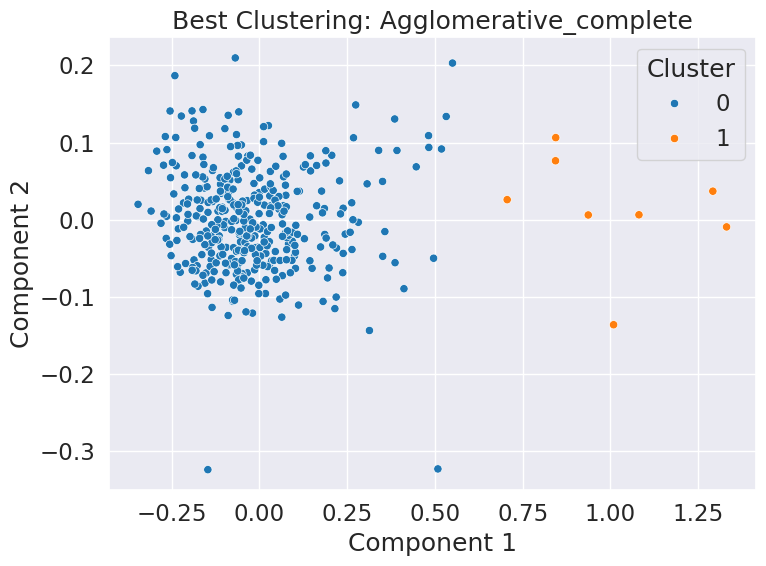

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Identify best ---
best_result_idx = results["rank_score"].idxmax()
best_result = results.loc[best_result_idx]
best_labels = best_result["labels"]
best_name = best_result_idx  # Because your index is the method name, like 'KMeans'

print(f"Best clustering method: {best_name}")
print(best_result)

# --- Plot best ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=best_labels, palette='tab10')
plt.title(f"Best Clustering: {best_name}")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


### Compare to DBSCAN

          silhouette   calinski n_clusters
MeanShift   0.400957  29.646975          6
DBSCAN             0          0          1
OPTICS             0          0          1


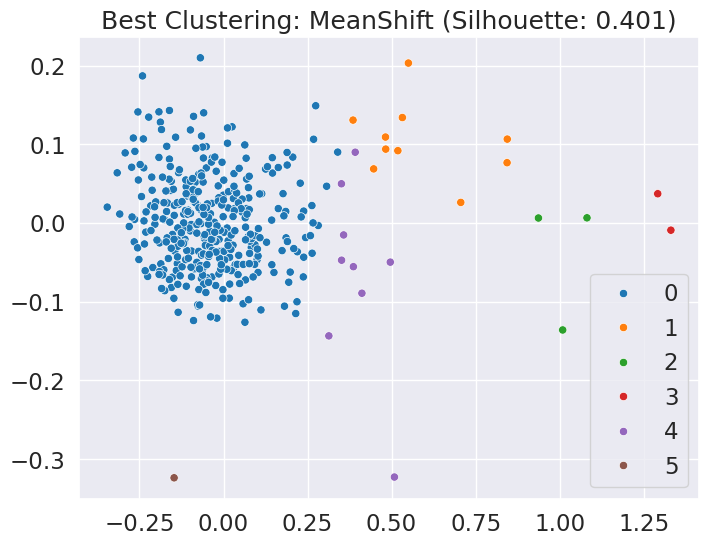

In [20]:

from sklearn.cluster import OPTICS, MeanShift


cluster_algorithms_no_n  = {
    "DBSCAN": DBSCAN(eps=1.5, min_samples=5),
    "OPTICS": OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1),
    "MeanShift": MeanShift(),
}

results_no_n = {}

for name, model in cluster_algorithms_no_n.items():
    try:
        labels = model.fit_predict(X_encoded)
    except Exception as e:
        print(f"{name} failed: {e}")
        continue

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 1:
        silhouette = silhouette_score(outputs_normalized, labels)
        calinski = calinski_harabasz_score(outputs_normalized, labels)
    else:
        silhouette = 0
        calinski = 0

    results_no_n[name] = {
        "name": name,
        "labels": labels,
        "silhouette": silhouette,
        "calinski": calinski,
        "n_clusters": n_clusters
    }

# --- Identify best ---
best_name = max(results_no_n, key=lambda k: results_no_n[k]["silhouette"])
best_labels = results_no_n[best_name]["labels"]

# --- Summary table ---
summary_df = pd.DataFrame(results_no_n).T[
    ["silhouette", "calinski", "n_clusters"]
].sort_values("silhouette", ascending=False)

print(summary_df)

# --- Plot best ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=best_labels, palette='tab10')
plt.title(f"Best Clustering: {best_name} (Silhouette: {results_no_n[best_name]['silhouette']:.3f})")
plt.show()



In [21]:

results_no_n = pd.DataFrame(results_no_n).T
results_no_n

,name,labels,silhouette,calinski,n_clusters
DBSCAN,DBSCAN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,1
OPTICS,OPTICS,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",0,0,1
MeanShift,MeanShift,"[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.400957,29.646975,6


### Visualize choice of N and algorithm

/tmp/ipykernel_1901358/1505012874.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(n_clusters_range, current_result['silhouettes'][0], marker='o')
/tmp/ipykernel_1901358/1505012874.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(n_clusters_range, current_result['calinskis'][0], marker='o')
/tmp/ipykernel_1901358/1505012874.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(n_clusters_range, curre

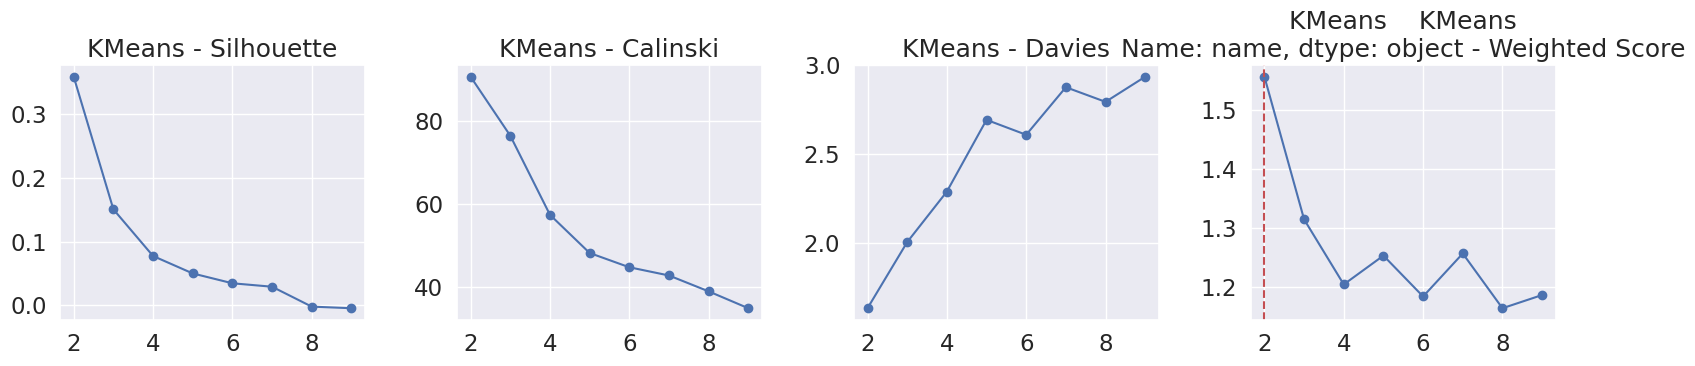

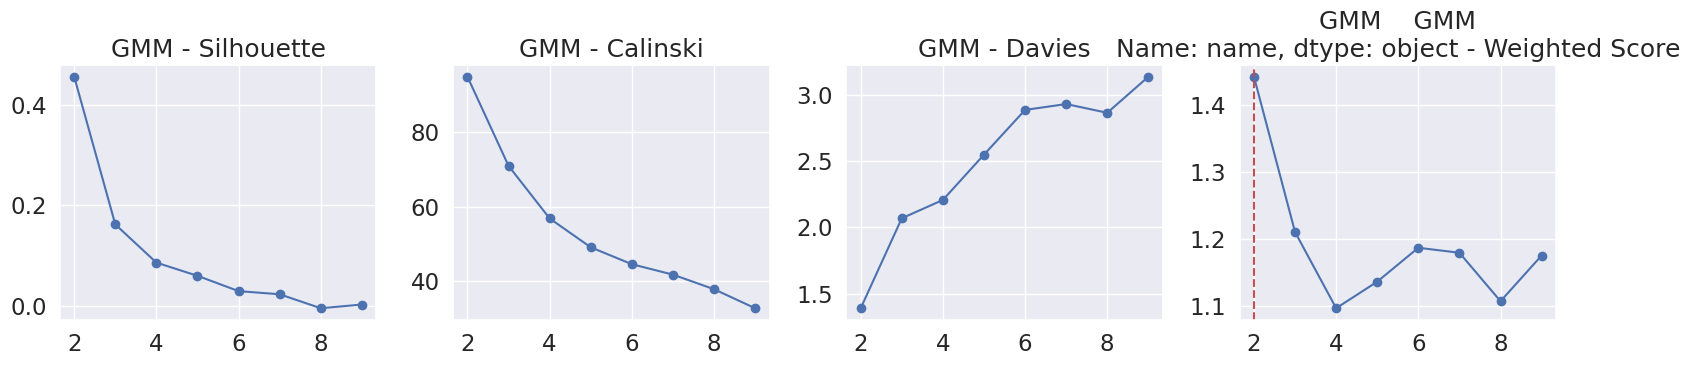

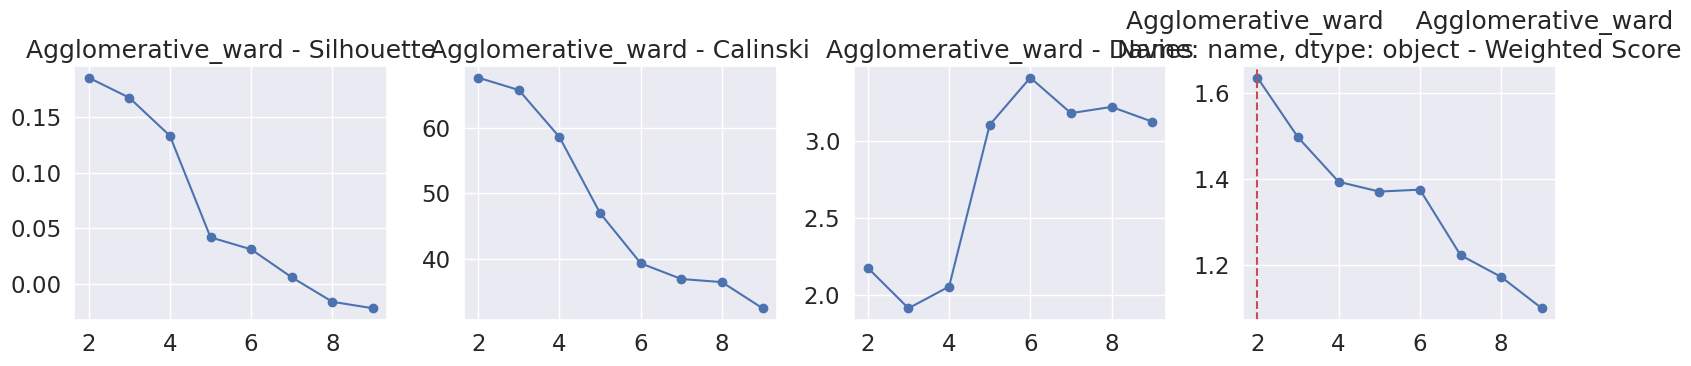

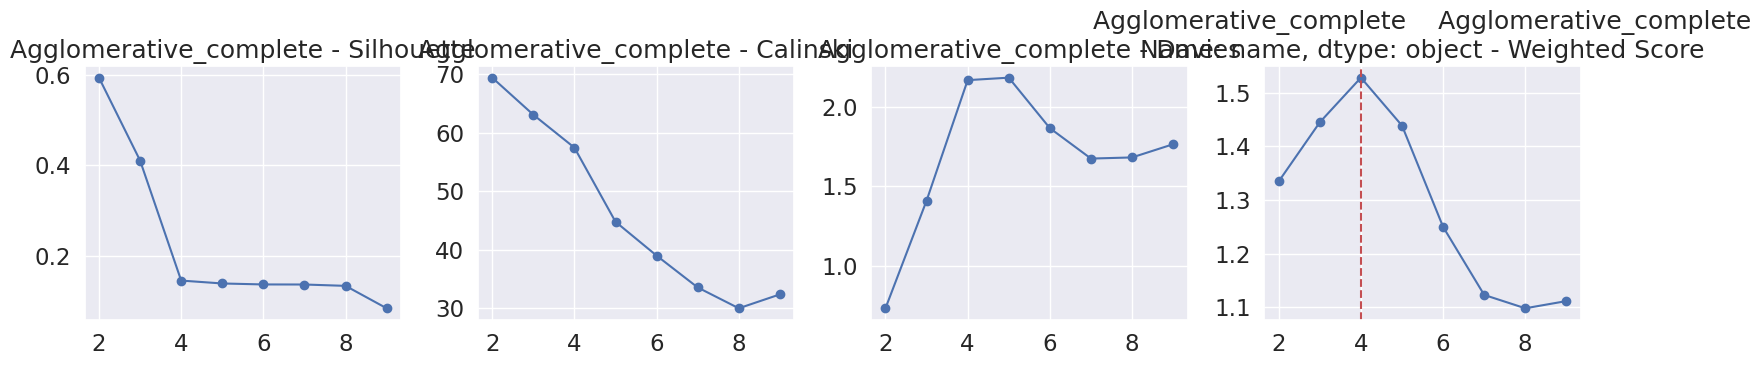

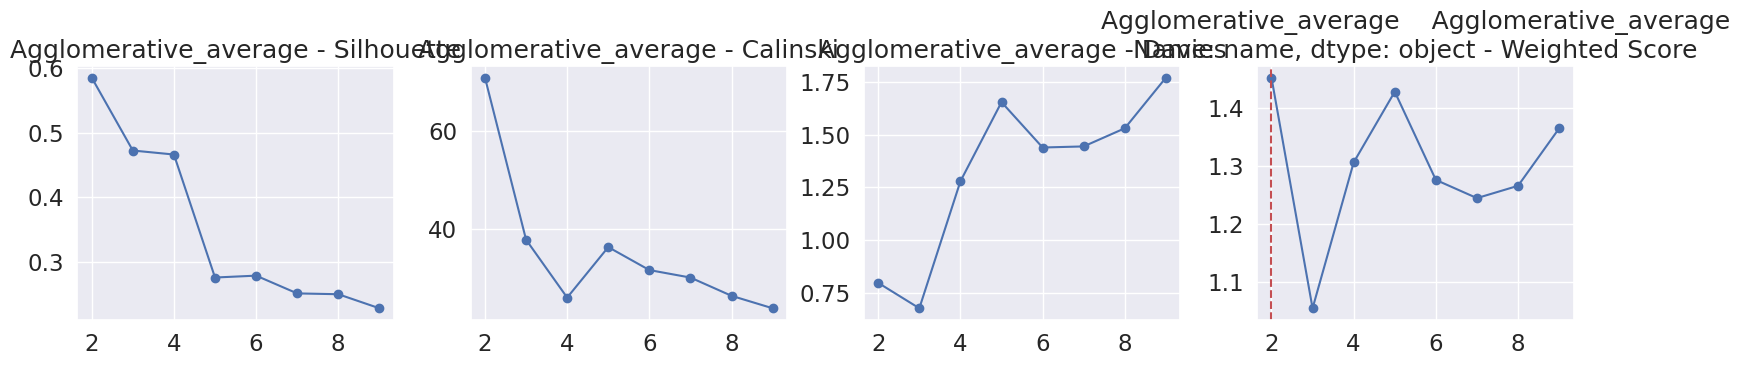

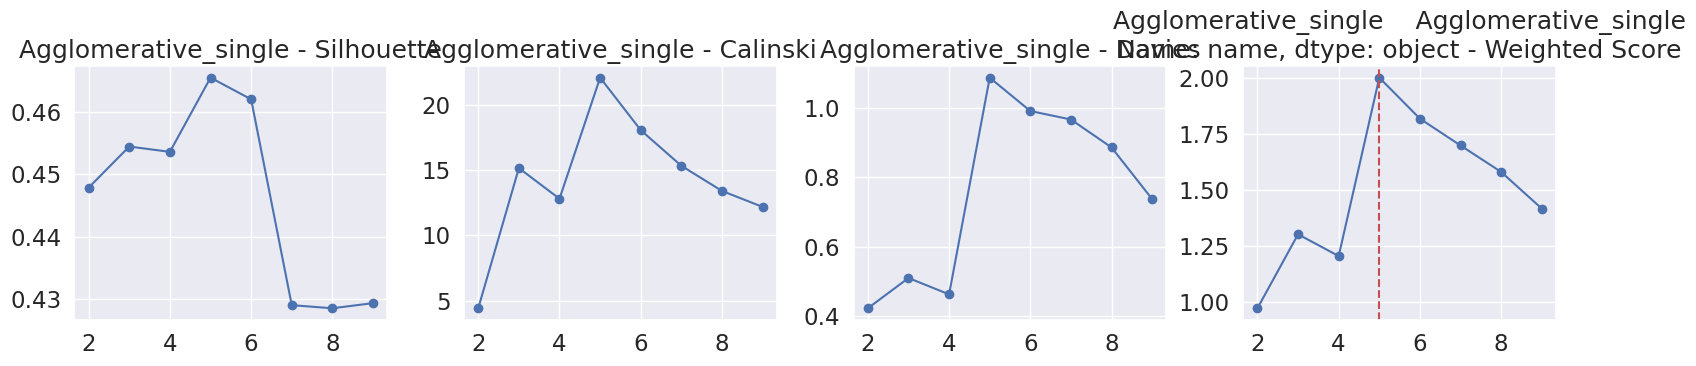

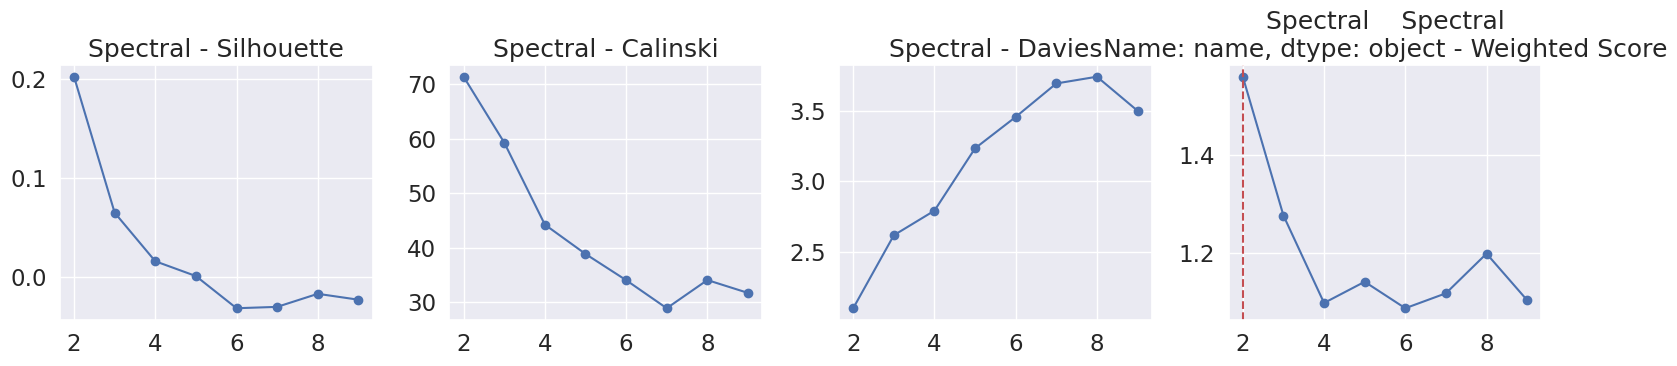

In [22]:
#Plot optimization curves
for name in results["name"].unique():
    current_result = results[results["name"] == name]
    
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 4, 1)
    plt.plot(n_clusters_range, current_result['silhouettes'][0], marker='o')
    plt.title(f"{name} - Silhouette")

    plt.subplot(1, 4, 2)
    plt.plot(n_clusters_range, current_result['calinskis'][0], marker='o')
    plt.title(f"{name} - Calinski")

    plt.subplot(1, 4, 3)
    plt.plot(n_clusters_range, current_result['daviess'][0], marker='o')
    plt.title(f"{name} - Davies")

    # Weighted score subplot
    weights = {'silhouette': 0.5, 'calinski': 0.5, 'daviess': 1.0}
    sil_norm = np.array(current_result['silhouettes'][0]) / np.max(current_result['silhouettes'][0])
    cal_norm = np.array(current_result['calinskis'][0]) / np.max(current_result['calinskis'][0])
    dav_norm = np.array(current_result['daviess'][0]) / np.max(current_result['daviess'][0])
    combined_score = weights['silhouette'] * sil_norm + weights['calinski'] * cal_norm + weights['daviess'] * dav_norm

    plt.subplot(1, 4, 4)
    plt.plot(n_clusters_range, combined_score, marker='o')
    plt.title(f"{current_result["name"]} - Weighted Score")
    best_index = np.argmax(combined_score)
    best_cluster_n = n_clusters_range[best_index]
    plt.axvline(x=best_cluster_n, color='r', linestyle='--')

    plt.tight_layout()
    plt.show()

### Visualize clusters as heatmap

In [29]:
best_cluster

,name,labels,silhouette,calinski,davies,best_n,silhouettes,calinskis,daviess,rank_score
Agglomerative_complete,Agglomerative_complete,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.786037,269.913788,0.32763,2,"[0.5943932290301388, 0.41088898453613193, 0.14...","[69.45703148523222, 63.109226469394336, 57.469...","[0.7316117239073966, 1.4101685054525124, 2.169...",10.5


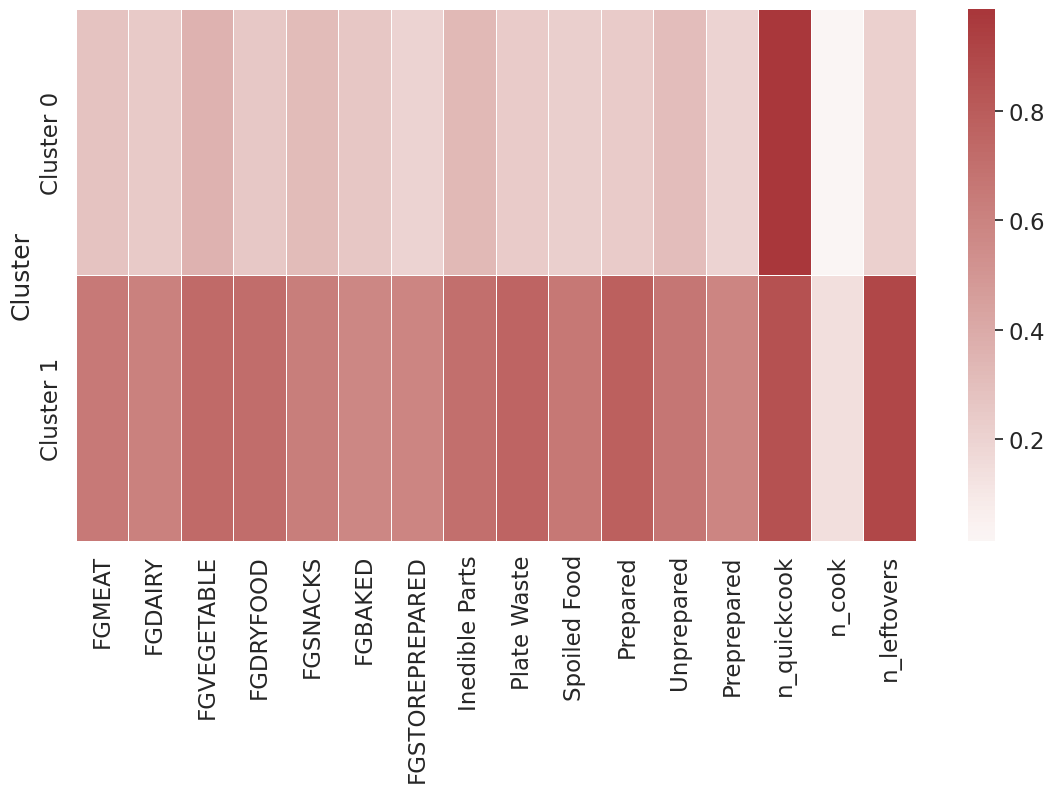

In [23]:
# Get normalized values

# Select the best clustering result based on maximum rank_score
best_cluster = results.loc[results["rank_score"].idxmax()]
labels = best_cluster["labels"]  # These labels correspond in order to outputs_normalized
k = len(np.unique(labels))

# Add labels to the normalized output data
outputs_with_labels = outputs_normalized.copy()
outputs_with_labels["labels"] = labels

# Calculate mean values per cluster
normalized_means = []
for i in range(k):
    cluster_data = outputs_with_labels[outputs_with_labels["labels"] == i]
    mean_normalized = cluster_data.drop(columns="labels").mean()
    normalized_means.append(mean_normalized.to_frame().T)

# Combine all cluster means into a single DataFrame
normalized_means_df = pd.concat(normalized_means, ignore_index=True)

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.set(font_scale=1.5)

ax = sns.heatmap(
    normalized_means_df.to_numpy(), 
    linewidth=0.5, 
    xticklabels=normalized_means_df.columns, 
    yticklabels=[f"Cluster {i}" for i in range(k)],
    center=0,
    cmap='vlag'
)
ax.set_ylabel("Cluster")
plt.tight_layout()
plt.show()


In [24]:
best_cluster 

name                                      Agglomerative_complete
labels         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
silhouette                                              0.786037
calinski                                              269.913788
davies                                                   0.32763
best_n                                                         2
silhouettes    [0.5943932290301388, 0.41088898453613193, 0.14...
calinskis      [69.45703148523222, 63.109226469394336, 57.469...
daviess        [0.7316117239073966, 1.4101685054525124, 2.169...
rank_score                                                  10.5
Name: Agglomerative_complete, dtype: object

In [25]:
outputs_normalized

,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,n_quickcook,n_cook,n_leftovers
0,0.304077,0.299642,0.525307,0.143289,0.087724,0.299809,0.268329,0.475999,0.183295,0.313561,0.184101,0.460079,0.268329,1.00000,0.00000,0.000000
1,0.153778,0.440361,0.703657,0.292630,0.356840,0.160469,0.345135,0.514028,0.294821,0.355017,0.299829,0.440657,0.345135,1.00000,0.00000,0.000000
2,0.542994,0.831809,0.896215,0.885357,0.710757,0.483759,0.411338,0.757229,0.928753,0.412916,0.880969,0.715040,0.411338,0.69697,0.30303,0.934066
3,0.225723,0.287914,0.280727,0.280970,0.239883,0.378132,0.168582,0.216321,0.230279,0.247034,0.226619,0.296604,0.168582,1.00000,0.00000,0.000000
4,0.370837,0.469894,0.240301,0.422672,0.486367,0.262117,0.198463,0.305055,0.328274,0.313539,0.418888,0.248158,0.198463,1.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.266934,0.330203,0.352318,0.234257,0.435237,0.394706,0.217789,0.352250,0.295815,0.264282,0.357287,0.244364,0.217789,1.00000,0.00000,0.000000
380,0.295081,0.203002,0.333190,0.346171,0.534691,0.140240,0.159997,0.281952,0.272654,0.196703,0.266069,0.292289,0.159997,1.00000,0.00000,0.000000
381,0.131386,0.121367,0.347423,0.157301,0.375771,0.385633,0.216266,0.191813,0.167631,0.297833,0.206177,0.212075,0.216266,1.00000,0.00000,0.340659
382,0.134578,0.382769,0.233188,0.272932,0.214597,0.249849,0.173509,0.230863,0.205637,0.167800,0.227499,0.142639,0.173509,1.00000,0.00000,0.087912


In [26]:
outputs_normalized

,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,n_quickcook,n_cook,n_leftovers
0,0.304077,0.299642,0.525307,0.143289,0.087724,0.299809,0.268329,0.475999,0.183295,0.313561,0.184101,0.460079,0.268329,1.00000,0.00000,0.000000
1,0.153778,0.440361,0.703657,0.292630,0.356840,0.160469,0.345135,0.514028,0.294821,0.355017,0.299829,0.440657,0.345135,1.00000,0.00000,0.000000
2,0.542994,0.831809,0.896215,0.885357,0.710757,0.483759,0.411338,0.757229,0.928753,0.412916,0.880969,0.715040,0.411338,0.69697,0.30303,0.934066
3,0.225723,0.287914,0.280727,0.280970,0.239883,0.378132,0.168582,0.216321,0.230279,0.247034,0.226619,0.296604,0.168582,1.00000,0.00000,0.000000
4,0.370837,0.469894,0.240301,0.422672,0.486367,0.262117,0.198463,0.305055,0.328274,0.313539,0.418888,0.248158,0.198463,1.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.266934,0.330203,0.352318,0.234257,0.435237,0.394706,0.217789,0.352250,0.295815,0.264282,0.357287,0.244364,0.217789,1.00000,0.00000,0.000000
380,0.295081,0.203002,0.333190,0.346171,0.534691,0.140240,0.159997,0.281952,0.272654,0.196703,0.266069,0.292289,0.159997,1.00000,0.00000,0.000000
381,0.131386,0.121367,0.347423,0.157301,0.375771,0.385633,0.216266,0.191813,0.167631,0.297833,0.206177,0.212075,0.216266,1.00000,0.00000,0.340659
382,0.134578,0.382769,0.233188,0.272932,0.214597,0.249849,0.173509,0.230863,0.205637,0.167800,0.227499,0.142639,0.173509,1.00000,0.00000,0.087912


In [27]:
outputs_normalized["labels"] = best_cluster["labels"].tolist()
outputs_normalized.head()

,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,n_quickcook,n_cook,n_leftovers,labels
0,0.304077,0.299642,0.525307,0.143289,0.087724,0.299809,0.268329,0.475999,0.183295,0.313561,0.184101,0.460079,0.268329,1.00000,0.00000,0.000000,0
1,0.153778,0.440361,0.703657,0.292630,0.356840,0.160469,0.345135,0.514028,0.294821,0.355017,0.299829,0.440657,0.345135,1.00000,0.00000,0.000000,0
2,0.542994,0.831809,0.896215,0.885357,0.710757,0.483759,0.411338,0.757229,0.928753,0.412916,0.880969,0.715040,0.411338,0.69697,0.30303,0.934066,1
3,0.225723,0.287914,0.280727,0.280970,0.239883,0.378132,0.168582,0.216321,0.230279,0.247034,0.226619,0.296604,0.168582,1.00000,0.00000,0.000000,0
4,0.370837,0.469894,0.240301,0.422672,0.486367,0.262117,0.198463,0.305055,0.328274,0.313539,0.418888,0.248158,0.198463,1.00000,0.00000,0.000000,0


In [28]:
# get normalized values

best_cluster = results[results["rank_score"] == results["rank_score"].max()]
outputs_normalized["labels"] =be
k = len(np.unique(best_cluster["labels"][0]))

# Calculate mean values per cluster
normalized_means = []
for i in range(k):
    mean_normalized = outputs_normalized[outputs_normalized['labels'] == i].mean()
    normalized_means.append(mean_normalized.to_frame().transpose())

normalized_means_df = pd.concat(normalized_means)
normalized_means_df = normalized_means_df.drop(columns=["labels"])

# Plot heatmap with proper y-axis labels
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.set(font_scale=1.5)
ax = sns.heatmap(
    normalized_means_df.to_numpy(), 
    linewidth=0.5, 
    xticklabels=normalized_means_df.columns, 
    yticklabels=list(range(k)), 
    center=0
)
ax.set_ylabel("Cluster")
plt.show()


NameError: name 'be' is not defined

### Export data + cluster group ID + inputs 

In [ ]:
outputs["labels"] = best_cluster["labels"][0]

/tmp/ipykernel_1739486/2295176902.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  outputs["labels"] = best_cluster["labels"][0]


In [ ]:
merged = pd.concat([outputs, df_h],axis=1)

In [ ]:
outputs

In [ ]:
df_h

In [ ]:
merged